In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

import cartopy
import pop_tools
import util

In [2]:
infile = '../raw_data/cesm/b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.001.pop.h.nday1.0100-01-01.nc'
ds = xr.open_dataset(infile)
ds

<xarray.Dataset>
Dimensions:             (d2: 2, nlat: 384, nlon: 320, time: 31, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * time                (time) object 0100-01-02 00:00:00 ... 0100-02-01 00:00:00
  * z_t                 (z_t) float32 500.0 1500.0 2500.0 ... 512502.8 537500.0
  * z_t_150m            (z_t_150m) float32 500.0 1500.0 ... 13500.0 14500.0
  * z_w                 (z_w) float32 0.0 1000.0 2000.0 ... 500004.7 525000.94
  * z_w_top             (z_w_top) float32 0.0 1000.0 ... 500004.7 525000.94
  * z_w_bot             (z_w_bot) float32 1000.0 2000.0 ... 525000.94 549999.06
    ULONG               (nlat, nlon) float64 ...
    ULAT                (nlat, nlon) float64 ...
    TLONG               (nlat, nlon) float64 ...
    TLAT                (nlat, nlon) float64 ...
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound          (time, d2) object ...
    dz                  (z_t) float32 ...
    dzw                 (z_w) float32 ...
    KMT                 (nlat, nlon) float64 ...
    KMU                 (nlat, nlon) float64 ...
    REGION_MASK         (nlat, nlon) float64 ...
    UAREA               (nlat, nlon) float64 ...
    TAREA               (nlat, nlon) float64 ...
    HU                  (nlat, nlon) float64 ...
    HT                  (nlat, nlon) float64 ...
    DXU                 (nlat, nlon) float64 ...
    DYU                 (nlat, nlon) float64 ...
    DXT                 (nlat, nlon) float64 ...
    DYT                 (nlat, nlon) float64 ...
    HTN                 (nlat, nlon) float64 ...
    HTE                 (nlat, nlon) float64 ...
    HUS                 (nlat, nlon) float64 ...
    HUW                 (nlat, nlon) float64 ...
    ANGLE               (nlat, nlon) float64 ...
    ANGLET              (nlat, nlon) float64 ...
    days_in_norm_year   timedelta64[ns] ...
    grav                float64 ...
    omega               float64 ...
    radius              float64 ...
    cp_sw               float64 ...
    sound               float64 ...
    vonkar              float64 ...
    cp_air              float64 ...
    rho_air             float64 ...
    rho_sw              float64 ...
    rho_fw              float64 ...
    stefan_boltzmann    float64 ...
    latent_heat_vapor   float64 ...
    latent_heat_fusion  float64 ...
    ocn_ref_salinity    float64 ...
    sea_ice_salinity    float64 ...
    T0_Kelvin           float64 ...
    salt_to_ppt         float64 ...
    ppt_to_salt         float64 ...
    mass_to_Sv          float64 ...
    heat_to_PW          float64 ...
    salt_to_Svppt       float64 ...
    salt_to_mmday       float64 ...
    momentum_factor     float64 ...
    hflux_factor        float64 ...
    fwflux_factor       float64 ...
    salinity_factor     float64 ...
    sflux_factor        float64 ...
    nsurface_t          float64 ...
    nsurface_u          float64 ...
    U1_1                (time, nlat, nlon) float32 ...
    V1_1                (time, nlat, nlon) float32 ...
    U2_2                (time, nlat, nlon) float32 ...
    V2_2                (time, nlat, nlon) float32 ...
    SST                 (time, nlat, nlon) float32 ...
    SSS                 (time, nlat, nlon) float32 ...
    RESID_T             (time, nlat, nlon) float32 ...
    RESID_S             (time, nlat, nlon) float32 ...
    SSH                 (time, nlat, nlon) float32 ...
    SHF                 (time, nlat, nlon) float32 ...
    SHF_QSW             (time, nlat, nlon) float32 ...
    SFWF                (time, nlat, nlon) float32 ...
    SFWF_WRST           (time, nlat, nlon) float32 ...
    TAUX                (time, nlat, nlon) float32 ...
    TAUY                (time, nlat, nlon) float32 ...
    FW                  (time, nlat, nlon) float32 ...
    TFW_T               (time, nlat, nlon) float32 ...
    TFW_S               (time, nlat, nlon) float32 ...
    EVAP_F              (time, nlat, nlon) float32 ...
    PREC_F          

In [3]:
ds_gx1v6 = pop_tools.get_grid('POP_gx1v6')
ds_gx1v6

<xarray.Dataset>
Dimensions:      (nlat: 384, nlon: 320, z_t: 60, z_w: 60, z_w_bot: 60)
Coordinates:
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    TLAT         (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG        (nlat, nlon) float64 320.6 321.7 322.8 ... 318.9 319.4 319.8
    ULAT         (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
    ULONG        (nlat, nlon) float64 321.1 322.3 323.4 ... 319.2 319.6 320.0
    DXT          (nlat, nlon) float64 2.339e+06 2.339e+06 ... 1.473e+06
    DYT          (nlat, nlon) float64 5.94e+06 5.94e+06 ... 5.046e+06 5.046e+06
    TAREA        (nlat, nlon) float64 1.39e+13 1.39e+13 ... 7.431e+12 7.432e+12
    KMT          (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    REGION_MASK  (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    dz           (z_t) float64 1e+03 1e+03 1e+03 ... 2.499e+04 2.5e+04 2.5e+04
Attributes:
    lateral_dims:         [384, 320]
    vertical_dims:        60
    vert_grid_file:       gx1v7_vert_grid
    horiz_grid_fname:     inputdata/ocn/pop/gx1v6/grid/horiz_grid_20010402.ie...
    topography_fname:     inputdata/ocn/pop/gx1v6/grid/topography_20090204.ie...
    region_mask_fname:    inputdata/ocn/pop/gx1v6/grid/region_mask_20090205.i...
    type:                 dipole
    region_mask_regions:  {'Caspian Sea': -14, 'Black Sea': -13, 'Baltic Sea'...
    title:                POP_gx1v6 grid

In [4]:
dsp_gx1v6 =util.pop_add_cyclic(ds_gx1v6)
dsp_gx1v6

<xarray.Dataset>
Dimensions:      (nlat: 384, nlon: 321, z_t: 60, z_w: 60, z_w_bot: 60)
Coordinates:
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: nlat, nlon
Data variables:
    TLAT         (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 80.31 80.31 80.31
    TLONG        (nlat, nlon) float64 -220.6 -219.4 -218.3 ... -39.57 -39.86
    ULAT         (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 80.03 80.03 80.03
    ULONG        (nlat, nlon) float64 140.0 141.1 142.3 ... 320.5 320.3 320.0
    DXT          (nlat, nlon) float64 2.339e+06 2.339e+06 ... 5.335e+05
    DYT          (nlat, nlon) float64 5.94e+06 5.94e+06 ... 6.263e+06 6.263e+06
    TAREA        (nlat, nlon) float64 1.39e+13 1.39e+13 ... 3.342e+12 3.341e+12
    KMT          (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    REGION_MASK  (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    dz           (z_t) float64 1e+03 1e+03 1e+03 ... 2.499e+04 2.5e+04 2.5e+04

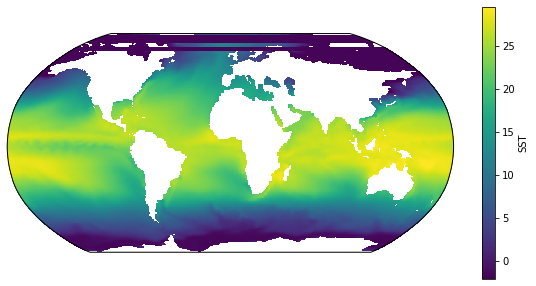

In [5]:
# proj = cartopy.crs.Mollweide(central_longitude=180)
proj = cartopy.crs.Robinson(central_longitude=180)
# proj = cartopy.crs.EqualEarth(central_longitude=180)
# proj = cartopy.crs.PlateCarree()
pc = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111,projection=proj)
subplt1=ax1.pcolormesh(dsp_gx1v6.TLONG,dsp_gx1v6.TLAT,ds.SST.isel(time=0),transform=pc)
cb = plt.colorbar(subplt1,shrink=0.5)
cb.set_label('SST')

pic1 = '../pics/HMXL_POP_gx1v6_proj_2020Jun30.png'
plt.savefig(pic1)